In [ ]:
import sys
print(sys.version)

3.10.12 (main, Jun 11 2023, 05:26:28) [GCC 11.4.0]


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
file = pd.read_csv('/content/drive/MyDrive/data_val_scaled.csv')
file = file.iloc[test_images]
file

,Unnamed: 0.1,Unnamed: 0,index,u,v,osmid,long,lat,bearing,geometry,valid,rating,scaled_rating
37,37,37,37,1242793400,1242793399,58228152,135.716063,35.021662,9.5,"LINESTRING (135.7160629 35.0216619, 135.716070...",0,25.148945,0.551033
49,49,49,49,1303276608,1303276906,115303687,135.747371,35.056568,266.0,"LINESTRING (135.7473706 35.0565679, 135.74714 ...",0,25.096953,0.549642
51,51,51,51,1318494682,1311739658,116338681,135.751085,35.036730,77.9,"LINESTRING (135.7510852 35.0367303, 135.751379...",0,25.476132,0.559792
56,56,56,56,309117121,309117094,28297444,135.769618,34.980682,84.5,"LINESTRING (135.7696176 34.9806815, 135.769969...",0,24.189694,0.525355
65,65,65,65,1736438526,1736438523,161679759,135.795711,35.039627,223.5,"LINESTRING (135.7957111 35.0396267, 135.795583...",0,18.644724,0.376921
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1413,1413,1413,1413,1744290200,1744290003,162566111,135.761898,35.000188,179.4,"LINESTRING (135.7618977 35.0001876, 135.761898...",0,22.553277,0.481550
1441,1441,1441,1441,7368654354,8464276551,788111087,135.768353,34.977551,96.4,"LINESTRING (135.7683535 34.9775515, 135.768566...",0,33.151755,0.765262
1446,1446,1446,1446,1215101383,912245309,98106489,135.742454,35.041872,177.9,"LINESTRING (135.7424539 35.0418724, 135.742477...",0,19.311440,0.394768
1461,1461,1461,1461,475809255,475809267,28382581,135.782763,35.010346,359.4,"LINESTRING (135.7827635 35.0103459, 135.782756...",0,36.292782,0.849345


In [ ]:
from keras.models import load_model
model = load_model("/content/drive/MyDrive//vgg_model.keras")

In [ ]:
import os
import numpy as np
from PIL import Image

all_imgs = []
for i in range(1500): # make sure images are read in the same order
  if i in test_images:
    loaded_img = np.array(Image.open("images_backup/" + str(i) + ".jpg").resize((224, 224)))
    all_imgs.append(loaded_img / 255)

#55458

In [ ]:
X = np.asarray(all_imgs, dtype=np.float32)
pred_values = model.predict(X)

7/7 [==============================] - 8s 1s/step


In [ ]:
file['pred'] = pred_values

In [ ]:
len(file[file['difference'] < 0.1])
len(file[file['difference'] >= 0.2])

9

In [ ]:
file['difference'] = abs(file['scaled_rating'] - file['pred'])
file = file.sort_values('difference')
file.to_csv('/content/drive/My Drive/test_images.csv', index=True)

In [ ]:
file["scaled_rating"].median()

0.5316658228864268

In [ ]:
# X[214]

In [ ]:
# model.predict(X[213:215])

1/1 [==============================] - 0s 90ms/step


array([[0.5010594 ],
       [0.58349675]], dtype=float32)

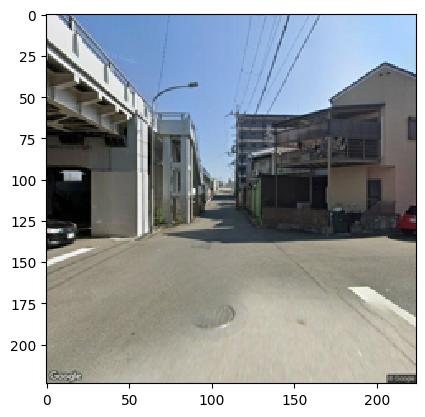

In [ ]:
from matplotlib import pyplot as plt
plt.imshow(X[214], interpolation='nearest')
plt.show()

3.11.3 (main, Apr 19 2023, 18:49:55) [Clang 14.0.6 ]


In [ ]:
# import matplotlib.pyplot as plt
# import numpy as np
# import os
# import tensorflow as tf

Text(0.5, 0, 'Error')

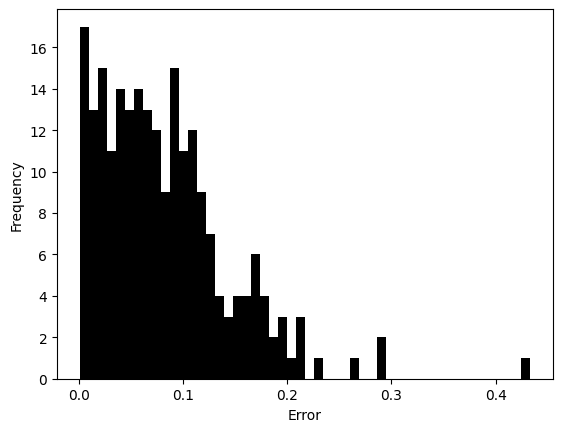

In [ ]:
file['difference'].plot(kind='hist', bins=50,color='black')
plt.xlabel("Error")